<a href="https://colab.research.google.com/github/plannermango/AI-for-deep-learning/blob/main/chapter05_fundamentals_of_ml_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 4ms/step - loss: 0.6123 - accuracy: 0.8135 - val_loss: 0.2505 - val_accuracy: 0.9259
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2445 - accuracy: 0.9252 - val_loss: 0.2013 - val_accuracy: 0.9348
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1611 - accuracy: 0.9503 - val_loss: 0.1437 - val_accuracy: 0.9578
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1133 - accuracy: 0.9641 - val_loss: 0.1456 - val_accuracy: 0.9568
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0828 - accuracy: 0.9738 - val_loss: 0.1289 - val_accuracy: 0.9649
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0599 - accuracy: 0.9812 - val_loss: 0.1223 - val_accuracy: 0.9668
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.1252 - val_accuracy: 0.9680
Epoch 

**Plotting a validation accuracy comparison**

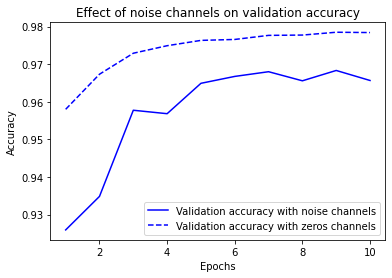

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3180 - accuracy: 0.1063 - val_loss: 2.3058 - val_accuracy: 0.1065
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.3003 - accuracy: 0.1168 - val_loss: 2.3106 - val_accuracy: 0.1012
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2903 - accuracy: 0.1291 - val_loss: 2.3192 - val_accuracy: 0.1041
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2764 - accuracy: 0.1389 - val_loss: 2.3242 - val_accuracy: 0.1021
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2593 - accuracy: 0.1538 - val_loss: 2.3361 - val_accuracy: 0.1025
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2393 - accuracy: 0.1649 - val_loss: 2.3459 - val_accuracy: 0.1000
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2158 - accuracy: 0.1821 - val_loss: 2.3702 - val_accuracy: 0.0946

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 819.9547 - accuracy: 0.3344 - val_loss: 2.8613 - val_accuracy: 0.2157
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8974 - accuracy: 0.2231 - val_loss: 3.1524 - val_accuracy: 0.2401
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 3.6365 - accuracy: 0.2090 - val_loss: 2.2166 - val_accuracy: 0.2153
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 3.0609 - accuracy: 0.2061 - val_loss: 2.3584 - val_accuracy: 0.2192
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6237 - accuracy: 0.1896 - val_loss: 2.2297 - val_accuracy: 0.1972
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4990 - accuracy: 0.2165 - val_loss: 2.2373 - val_accuracy: 0.2294
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7781 - accuracy: 0.2238 - val_loss: 2.0308 - val_accuracy: 0.2644
Epoc

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3572 - accuracy: 0.9124 - val_loss: 0.1696 - val_accuracy: 0.9546
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1361 - accuracy: 0.9649 - val_loss: 0.1560 - val_accuracy: 0.9675
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1129 - accuracy: 0.9740 - val_loss: 0.2188 - val_accuracy: 0.9610
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1003 - accuracy: 0.9771 - val_loss: 0.1737 - val_accuracy: 0.9728
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0863 - accuracy: 0.9815 - val_loss: 0.2241 - val_accuracy: 0.9702
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0767 - accuracy: 0.9846 - val_loss: 0.2231 - val_accuracy: 0.9719
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0729 - accuracy: 0.9862 - val_loss: 0.2390 - val_accuracy: 0.9699
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6645 - accuracy: 0.8344 - val_loss: 0.3591 - val_accuracy: 0.9009
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3502 - accuracy: 0.9037 - val_loss: 0.3083 - val_accuracy: 0.9127
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3154 - accuracy: 0.9122 - val_loss: 0.2900 - val_accuracy: 0.9187
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2992 - accuracy: 0.9165 - val_loss: 0.2810 - val_accuracy: 0.9214
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2894 - accuracy: 0.9196 - val_loss: 0.2754 - val_accuracy: 0.9250
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2830 - accuracy: 0.9209 - val_loss: 0.2736 - val_accuracy: 0.9257
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2779 - accuracy: 0.9221 - val_loss: 0.2697 - val_accuracy: 0.9274
Epoch 

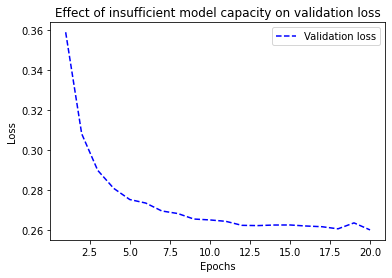

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3677 - accuracy: 0.8965 - val_loss: 0.2008 - val_accuracy: 0.9420
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1633 - accuracy: 0.9515 - val_loss: 0.1314 - val_accuracy: 0.9612
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1133 - accuracy: 0.9663 - val_loss: 0.1272 - val_accuracy: 0.9613
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0873 - accuracy: 0.9733 - val_loss: 0.1038 - val_accuracy: 0.9706
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0708 - accuracy: 0.9786 - val_loss: 0.0953 - val_accuracy: 0.9707
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0578 - accuracy: 0.9820 - val_loss: 0.0956 - val_accuracy: 0.9727
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0480 - accuracy: 0.9852 - val_loss: 0.0964 - val_accuracy: 0.9738
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.5285 - accuracy: 0.7806 - val_loss: 0.3923 - val_accuracy: 0.8777
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3148 - accuracy: 0.9003 - val_loss: 0.3782 - val_accuracy: 0.8401
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2317 - accuracy: 0.9269 - val_loss: 0.3073 - val_accuracy: 0.8760
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1800 - accuracy: 0.9435 - val_loss: 0.2843 - val_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1440 - accuracy: 0.9542 - val_loss: 0.2867 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1204 - accuracy: 0.9633 - val_loss: 0.2957 - val_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0999 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6333 - accuracy: 0.6589 - val_loss: 0.5865 - val_accuracy: 0.8336
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5405 - accuracy: 0.8069 - val_loss: 0.5330 - val_accuracy: 0.8041
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4920 - accuracy: 0.8495 - val_loss: 0.5176 - val_accuracy: 0.7815
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4586 - accuracy: 0.8771 - val_loss: 0.4894 - val_accuracy: 0.8537
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4323 - accuracy: 0.8998 - val_loss: 0.4792 - val_accuracy: 0.8578
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4113 - accuracy: 0.9157 - val_loss: 0.4691 - val_accuracy: 0.8672
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3929 - accuracy: 0.9287 - val_loss: 0.4702 - val_accuracy: 0.8558
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5482 - accuracy: 0.7409 - val_loss: 0.3328 - val_accuracy: 0.8694
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2688 - accuracy: 0.8965 - val_loss: 0.2637 - val_accuracy: 0.8929
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1525 - accuracy: 0.9443 - val_loss: 0.2920 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1031 - accuracy: 0.9677 - val_loss: 0.3818 - val_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1066 - accuracy: 0.9739 - val_loss: 0.3242 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0065 - accuracy: 0.9993 - val_loss: 0.4684 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.6263 - val_accuracy: 0.8815
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6001 - accuracy: 0.7828 - val_loss: 0.4670 - val_accuracy: 0.8692
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4037 - accuracy: 0.8965 - val_loss: 0.3905 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3398 - accuracy: 0.9125 - val_loss: 0.3682 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3034 - accuracy: 0.9243 - val_loss: 0.3719 - val_accuracy: 0.8817
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2912 - accuracy: 0.9273 - val_loss: 0.3813 - val_accuracy: 0.8763
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2746 - accuracy: 0.9355 - val_loss: 0.3808 - val_accuracy: 0.8779
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2606 - accuracy: 0.9405 - val_loss: 0.3909 - val_accuracy: 0.8762
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.6372 - accuracy: 0.6436 - val_loss: 0.5373 - val_accuracy: 0.8453
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5197 - accuracy: 0.7643 - val_loss: 0.4150 - val_accuracy: 0.8692
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4369 - accuracy: 0.8155 - val_loss: 0.3665 - val_accuracy: 0.8637
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3716 - accuracy: 0.8521 - val_loss: 0.3098 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3214 - accuracy: 0.8815 - val_loss: 0.2856 - val_accuracy: 0.8916
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2827 - accuracy: 0.9021 - val_loss: 0.2718 - val_accuracy: 0.8933
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2488 - accuracy: 0.9173 - val_loss: 0.2767 - val_accuracy: 0.8877
Epoch 8/20
30

## Summary